<a href="https://colab.research.google.com/github/smccracken13/Zestimate-Project/blob/main/Zestimate_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
# load zillow_clean.csv
files.upload()

Saving zillow_clean.csv to zillow_clean.csv


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv('zillow_clean.csv', low_memory=False, index_col = 'Unnamed: 0')

In [56]:
# Remove absolute log error column
df.drop(columns=['fips', 'abs_log_error'], inplace = True)

In [57]:
# set index to parcelid
df.set_index('parcelid', inplace=True)

In [58]:
cat_cols = ['transaction_month', 'transaction_day','transaction_quarter','aircon',
            'architecture', 'basementsqft', 'framing', 'deck', 'heating',
            'poolsizesum', 'county_land_use_code', 'land_use_code','zoning_code',
            'city', 'county', 'neighborhood','zipcode', 'storytypeid', 'material',
            'patio_sqft', 'shed_sqft','assessmentyear', 'taxdelinquencyyear','has_spa',
            'pool_with_spa', 'pool_without_spa', 'fireplaceflag']

prefix_list = ['tm', 'td', 'tq', 'air', 'arch', 'bsqft', 'fram', 'deck', 'heat',
               'poolsize', 'county_lu_code', 'lu_code', 'zoning', 'city',
               'county', 'neigh', 'zip', 'storyid', 'material', 'patiosqft', 'shedsqft',
               'assessyear', 'taxdelyear', 'has_spa', 'pool_with_spa', 'pool_without_spa', 'fireplaceflag']

prefix_dict = dict(zip(cat_cols, prefix_list))

In [59]:
# one-hot encode cat cols
df = pd.get_dummies(df, columns = cat_cols, prefix= prefix_dict, drop_first=True)
print(len(df.columns))

983


In [60]:
# Create train_test_split
X = df.loc[:, df.columns != 'logerror']
y = df['logerror']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
# sort into descending order
sorted_indices = importances.argsort()[::-1]

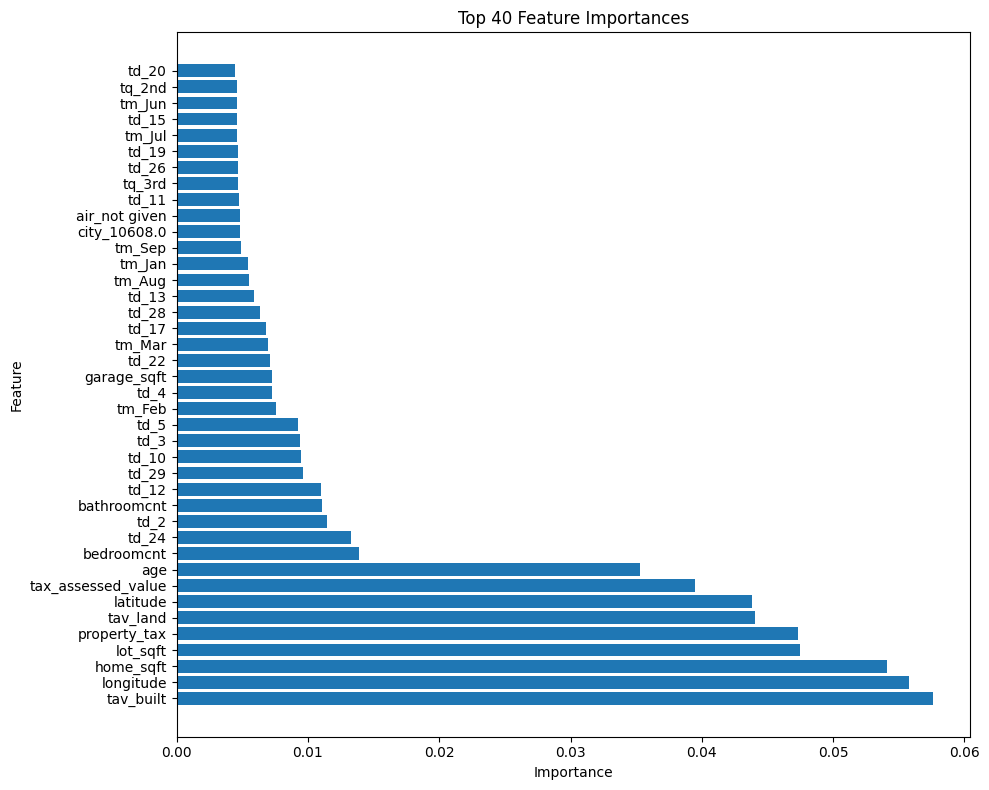

In [76]:
# plot top 30

# get top 30
importances = rf.feature_importances_
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances = importances.sort_values(by='Importance', ascending=False)
top_40_features = importances.head(40)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(top_40_features['Feature'], top_40_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 40 Feature Importances')
plt.tight_layout()
plt.show()